In [1]:
from mint.config import DATA_DIR
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Kiến trúc dữ liệu

In [2]:
def load_json(path):
    with open(path, 'r', encoding='utf-8') as f:
        return json.load(f)

data_dir = DATA_DIR("SVAMP")

data = load_json(os.path.join(data_dir, 'SVAMP.json'))

In [3]:
print(type(data))
print(type(data[0]))

<class 'list'>
<class 'dict'>


In [4]:
first_element = data[0]
print(first_element.keys())

dict_keys(['ID', 'Body', 'Question', 'Equation', 'Answer', 'Type'])


In [5]:
df = pd.DataFrame(data)
df.head(15)

,ID,Body,Question,Equation,Answer,Type
0,chal-1,Each pack of dvds costs 76 dollars. If there i...,How much do you have to pay to buy each pack?,( 76.0 - 25.0 ),51.0,Subtraction
1,chal-2,Dan had $ 3 left with him after he bought a ca...,How much did the candy bar cost?,( 4.0 - 3.0 ),1.0,Subtraction
2,chal-3,Paco had 26 salty cookies and 17 sweet cookies...,How many salty cookies did Paco have left?,( 26.0 - 9.0 ),17.0,Subtraction
3,chal-4,43 children were riding on the bus. At the bus...,How many children got off the bus at the bus s...,( 43.0 - 21.0 ),22.0,Subtraction
4,chal-5,28 children were riding on the bus. At the bus...,How many more children got on the bus than tho...,( 30.0 - 28.0 ),2.0,Subtraction
5,chal-6,There were 3 dollars in Olivia's wallet. She c...,How much more money did she collect at the atm...,( 49.0 - 3.0 ),46.0,Subtraction
6,chal-7,Jerry had some action figures on a shelf in hi...,How many action figures did he have initially ...,( 10.0 - 7.0 ),3.0,Subtraction
7,chal-8,Paco had 41 cookies. He gave 9 cookies to his ...,How many more cookies did he eat than those he...,( 18.0 - 9.0 ),9.0,Subtraction
8,chal-9,Mary is baking a cake. The recipe calls for 3 ...,How many more cups of flour does she need to add?,( 10.0 - 6.0 ),4.0,Subtraction
9,chal-10,A waiter had some customers. After 9 customers...,How many customers did he have at the start?,( 9.0 + 12.0 ),21.0,Addition


# Thống kê

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        1000 non-null   object 
 1   Body      1000 non-null   object 
 2   Question  1000 non-null   object 
 3   Equation  1000 non-null   object 
 4   Answer    1000 non-null   float64
 5   Type      1000 non-null   object 
dtypes: float64(1), object(5)
memory usage: 47.0+ KB
None


In [7]:
len_total = len(df)
print("Length of total: ", len_total)

Length of total:  1000


In [8]:
number_of_type = df["Type"].value_counts()
print("Number of ",number_of_type)

Number of  Type
Subtraction        531
Addition           195
Common-Division    165
Multiplication     108
Common-Divison       1
Name: count, dtype: int64


In [9]:
df['Type'] = df['Type'].replace({'Common-Divison': 'Common-Division'})

number_of_type = df["Type"].value_counts()
print("Number of ",number_of_type)

Number of  Type
Subtraction        531
Addition           195
Common-Division    166
Multiplication     108
Name: count, dtype: int64


In [10]:
def count_operators(equation):
    return sum(equation.count(op) for op in ['+', '-', '*', '/'])

count_zero_op = df[df["Equation"].apply(count_operators) == 0].shape[0]
print("Number of Equation with no operator: ", count_zero_op)

count_one_op = df[df["Equation"].apply(count_operators) == 1].shape[0]
print("Number of Equation with at one operator: ", count_one_op)

count_two_op = df[df["Equation"].apply(count_operators) == 2].shape[0]
print("Number of Equation with two operators: ", count_two_op)

Number of Equation with no operator:  1
Number of Equation with at one operator:  762
Number of Equation with two operators:  237


In [11]:
df[df["Equation"].apply(count_operators) == 0].head()

,ID,Body,Question,Equation,Answer,Type
554,chal-555,For the walls of the house he would use 8 larg...,How many planks does John need for the house w...,8.0,8.0,Common-Division


In [12]:
print('Number of Missing values in each column')
i = df.isnull().sum()
print(i,'\n')

Number of Missing values in each column
ID          0
Body        0
Question    0
Equation    0
Answer      0
Type        0
dtype: int64 



In [13]:
df['question_length'] = df['Question'].apply(lambda x: len(x.split()))
df['body_length'] = df['Body'].apply(lambda x: len(x.split()))

print(df[['question_length', 'body_length']].describe())

       question_length  body_length
count       1000.00000  1000.000000
mean           9.45800    22.296000
std            2.92691     7.111185
min            4.00000     4.000000
25%            7.00000    17.000000
50%            9.00000    21.000000
75%           11.00000    27.000000
max           19.00000    46.000000


# Visualize

Total:  9458
Max:  19
Min:  4


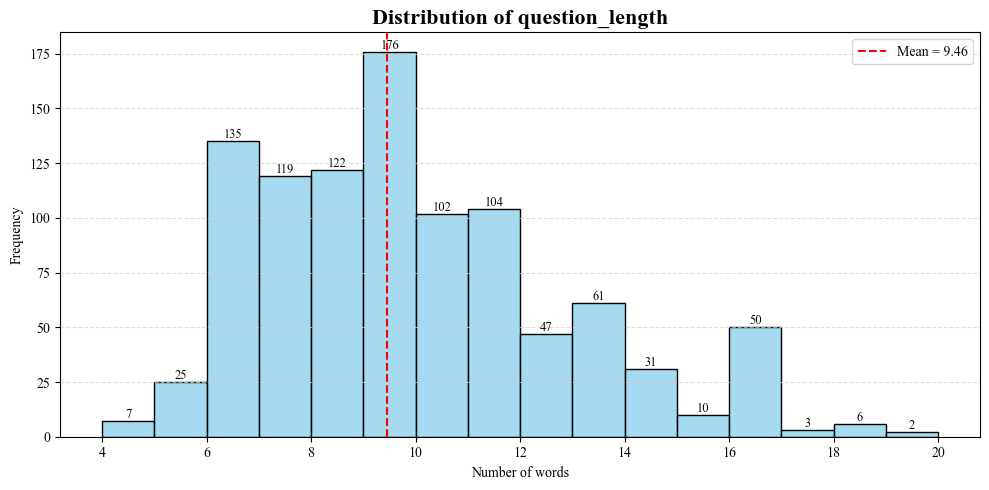

Total:  22296
Max:  46
Min:  4


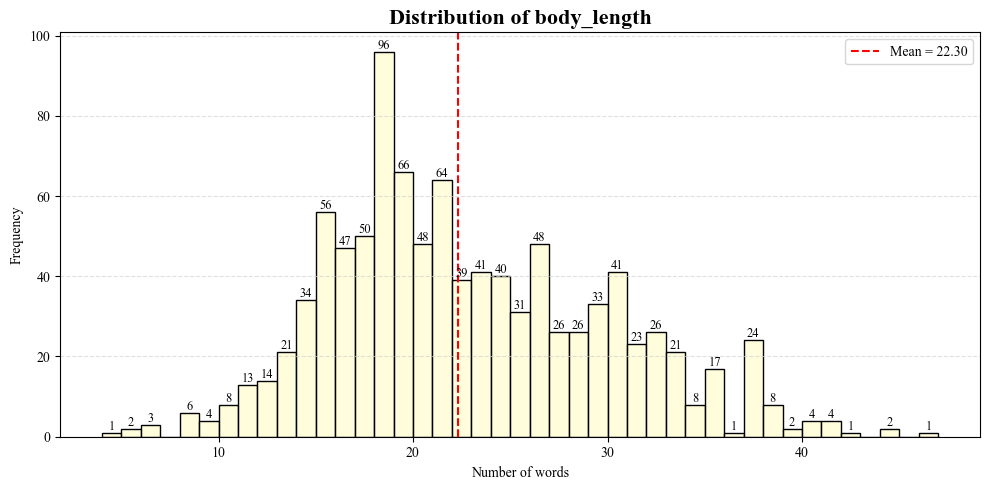

In [14]:
plt.rcParams['font.family'] = 'Times New Roman'
def plot_length_distribution(df, column, color):
    min_val = df[column].min()
    max_val = df[column].max()
    total = df[column].sum()

    print('Total: ', total)
    print('Max: ', max_val)
    print('Min: ',min_val)
    
    plt.figure(figsize=(10, 5))
    ax = sns.histplot(df[column], bins=range(min_val, max_val + 2), color=color)
    plt.title(f'Distribution of {column}', fontweight='bold', fontsize=16)
    plt.xlabel('Number of words')
    plt.ylabel('Frequency')
    
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}',
                        (p.get_x() + p.get_width() / 2, height),
                        ha='center', va='bottom', fontsize=9, color='black')
    
    mean_value = df[column].mean()
    ax.axvline(x=mean_value, color='red', linestyle='--', linewidth=1.5, label=f'Mean = {mean_value:.2f}')
    
    plt.grid(axis='x', visible=False)
    plt.grid(axis='y', linestyle='--', color='lightgray', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_length_distribution(df, 'question_length', 'skyblue')
plot_length_distribution(df, 'body_length', '#FFFDD0')

/var/folders/zl/w0vj8dg91gg3w47_8p3fp2r00000gn/T/ipykernel_4424/3703323668.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


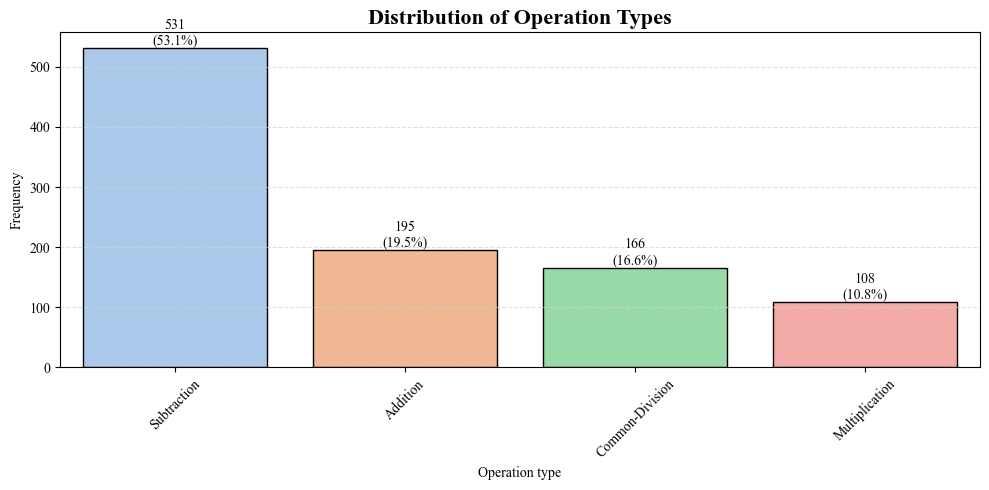

In [15]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(
    data=df,
    x='Type',
    hue=None,  
    order=df['Type'].value_counts().index,
    palette='pastel',
    edgecolor='black',
    linewidth=1
)

for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / len_total:.1f}%'
    ax.annotate(f'{int(height)}\n({percentage})', 
                (p.get_x() + p.get_width() / 2, height), 
                ha='center', va='bottom', fontsize=10)


plt.title('Distribution of Operation Types', fontweight='bold', fontsize=16)
plt.xlabel('Operation type')
plt.ylabel('Frequency')
plt.xticks(rotation = 45)
plt.grid(axis='x', visible = False)
plt.grid(axis='y', linestyle='--', color='lightgray', alpha=0.7)
plt.tight_layout()
plt.show()

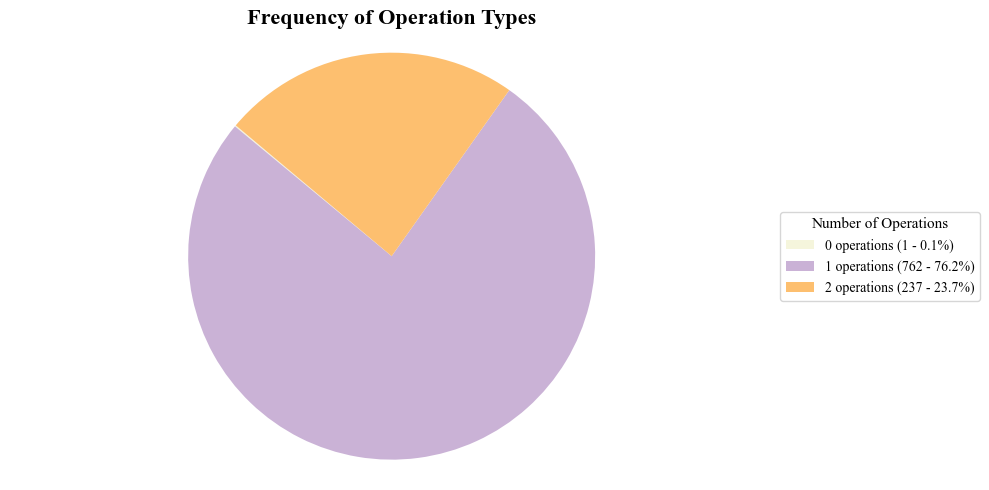

In [16]:
colors = ["#f5f5dc", "#cab2d6", "#fdbf6f"]
df["operator_count"] = df["Equation"].apply(count_operators)
operator_counts = df["operator_count"].value_counts().sort_index()

total = operator_counts.sum()
labels = operator_counts.index
sizes = operator_counts.values
percent_labels = [f'{label} operations ({count} - {count/total*100:.1f}%)' 
                  for label, count in zip(labels, sizes)]

plt.figure(figsize=(10, 5))
wedges, texts = plt.pie(
    sizes,
    startangle=140,
    colors=colors
)

plt.title('Frequency of Operation Types', fontweight='bold', fontsize=16)
plt.axis('equal')

plt.legend(
    wedges,
    percent_labels,
    title='Number of Operations',
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    fontsize=10,
    title_fontsize=11
)

plt.tight_layout()
plt.show()